In [1]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("mllion/facebook-marketplace-data")

# print("Path to dataset files:", path)
dataset_path = "/Users/admin/.cache/kagglehub/datasets/mllion/facebook-marketplace-data/versions/1"
files = os.listdir(dataset_path)

csv_files = [f for f in files if f.endswith(".csv")]
if csv_files:
    csv_file = os.path.join(dataset_path, csv_files[0])
    df = pd.read_csv(csv_file)
    print(df.head())
else:
    print("No CSV file found in the dataset folder!")

/Users/admin/Documents/Yen Nhi/Python_1/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  Column1  Column2  Column3  Column4  
0           0      NaN      NaN      NaN      NaN  
1           0      NaN      Na

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [6]:
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [7]:
# columns_to_drop = ['Column1', 'Column2', 'Column3', 'Column4']
# df = df.drop(columns=columns_to_drop)

In [8]:
# Conver `status_published` to datetime
df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')

In [9]:
# Extract hour from timestamp
df['hour'] = df['status_published'].dt.hour
# Check for missing data
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
hour                0
dtype: int64


<!-- How does the time of upload (status_published) affects the num_reaction? -->

/var/folders/hf/fyy10_zx2qj8z6bdpsgvd8h80000gn/T/ipykernel_63984/213058017.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_reactions.index, y=hourly_reactions.values, palette="viridis")


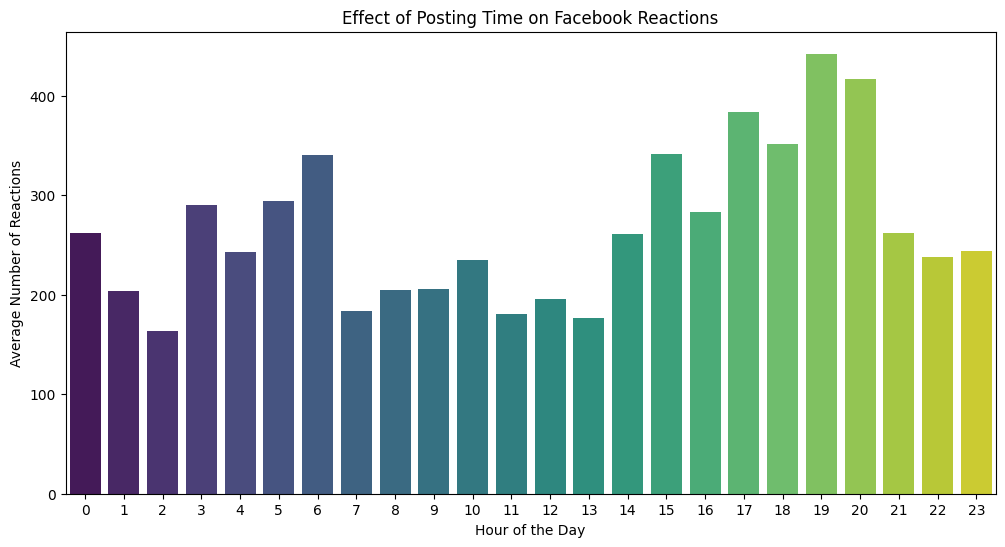

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by hour and calculate average reactions
hourly_reactions = df.groupby("hour")["num_reactions"].mean()

# Set the style of seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_reactions.index, y=hourly_reactions.values, palette="viridis")

# Add labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Reactions")
plt.title("Effect of Posting Time on Facebook Reactions")
# plt.xticks(range(0, 24))

# Show the chart
plt.show()


/var/folders/hf/fyy10_zx2qj8z6bdpsgvd8h80000gn/T/ipykernel_63984/661644506.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_reactions.index, y=weekday_reactions.values, palette="viridis")


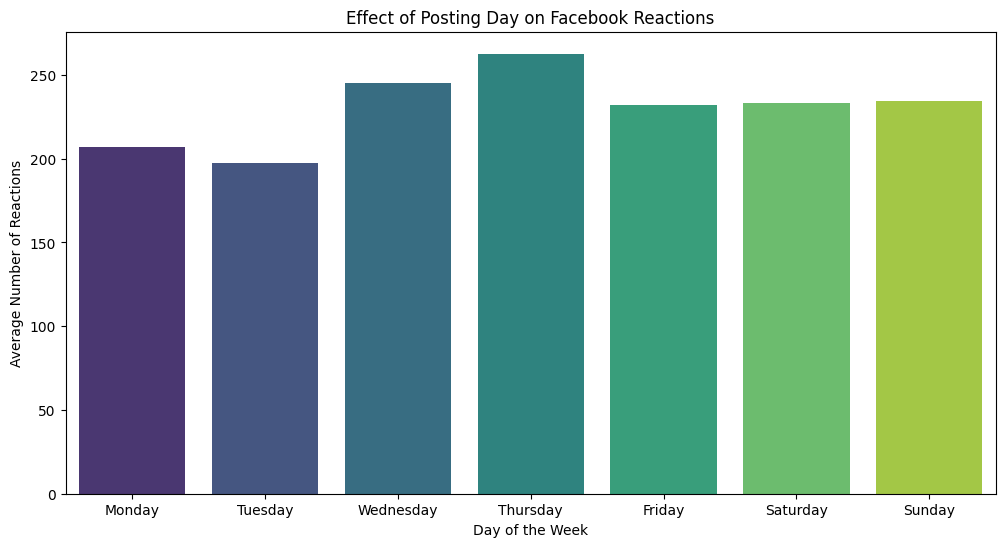

In [22]:
# Extract day of the week from timestamp
df['day_of_week'] = df['status_published'].dt.day_name()

#Group by day of the week and calculate average reactions
weekday_reactions = df.groupby("day_of_week")["num_reactions"].mean()

# Set up filter (Monday → Sunday)
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_reactions = weekday_reactions.reindex(weekday_order)

# Set the style of seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_reactions.index, y=weekday_reactions.values, palette="viridis")

# Add labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Reactions")
plt.title("Effect of Posting Day on Facebook Reactions")


# Hiển thị biểu đồ
plt.show()


/var/folders/hf/fyy10_zx2qj8z6bdpsgvd8h80000gn/T/ipykernel_63984/1537452925.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_reactions.index, y=monthly_reactions.values, palette="magma")


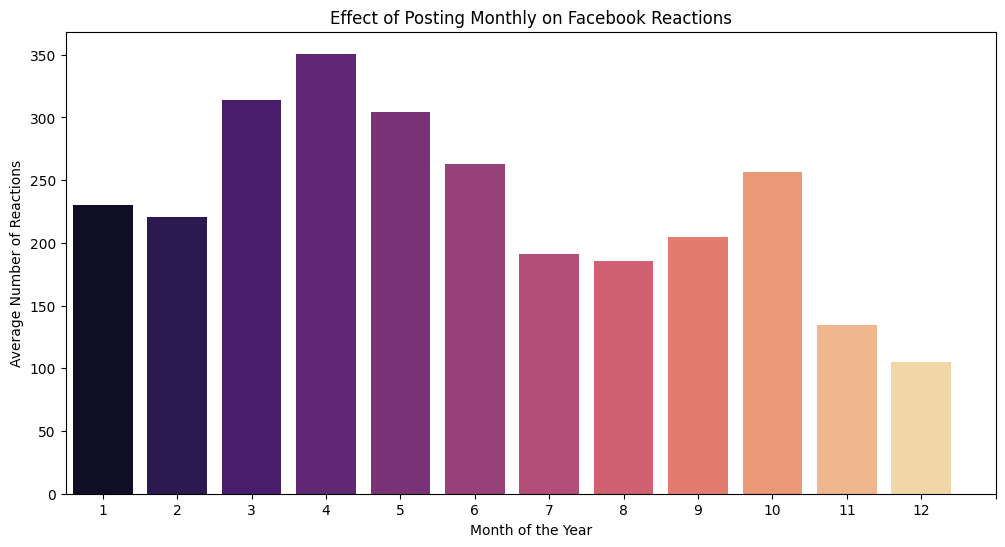

In [27]:
# Extract hour from timestamp
df['month'] = df['status_published'].dt.month
# Group by hour and calculate average reactions
monthly_reactions = df.groupby("month")["num_reactions"].mean()

# Set the style of seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_reactions.index, y=monthly_reactions.values, palette="magma")

# Add labels and title
plt.xlabel("Month of the Year")
plt.ylabel("Average Number of Reactions")
plt.title("Effect of Posting Monthly on Facebook Reactions")
plt.xticks(ticks=range(0, 13))

# Show the chart
plt.show()

<!-- Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation? -->

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   int64         
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
 12  hour              7050 non-null   int32         
 13  month             7050 non-null   int32         
 14  day_of_week       7050 n

In [30]:
# Calculate the correlation matrix between num_reaction, num_comments, and num_shares
correlation_matrix = df[['num_reactions', 'num_comments', 'num_shares']].corr()
correlation_matrix


,num_reactions,num_comments,num_shares
num_reactions,1.000000,0.150843,0.250723
num_comments,0.150843,1.000000,0.640637
num_shares,0.250723,0.640637,1.000000


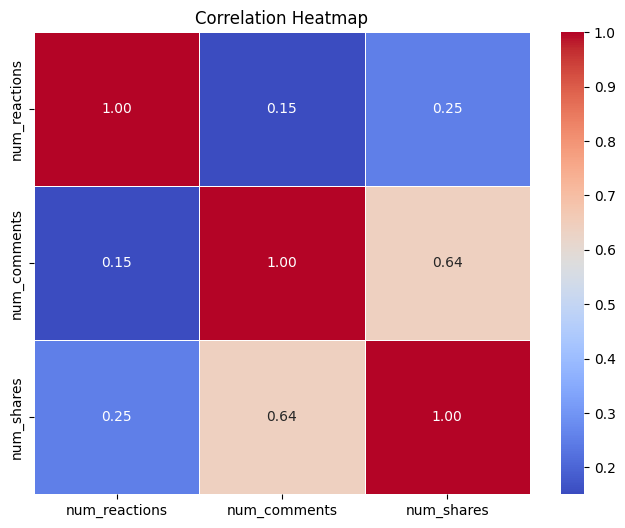

In [33]:
# Heatmap drawing
plt.figure(figsize=(8, 6))
sns.heatmap(df[['num_reactions', 'num_comments', 'num_shares']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

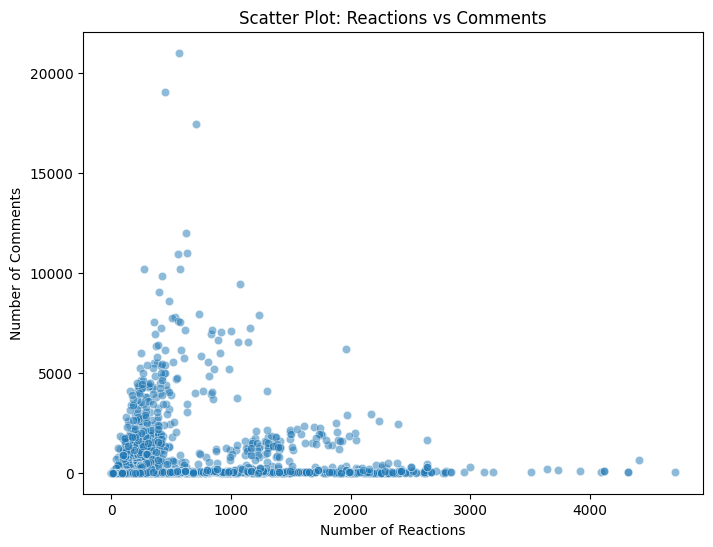

In [34]:
# scatter plot draw between num_reaction and num_comments
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['num_reactions'], y=df['num_comments'], alpha=0.5)
plt.xlabel("Number of Reactions")
plt.ylabel("Number of Comments")
plt.title("Scatter Plot: Reactions vs Comments")
plt.show()


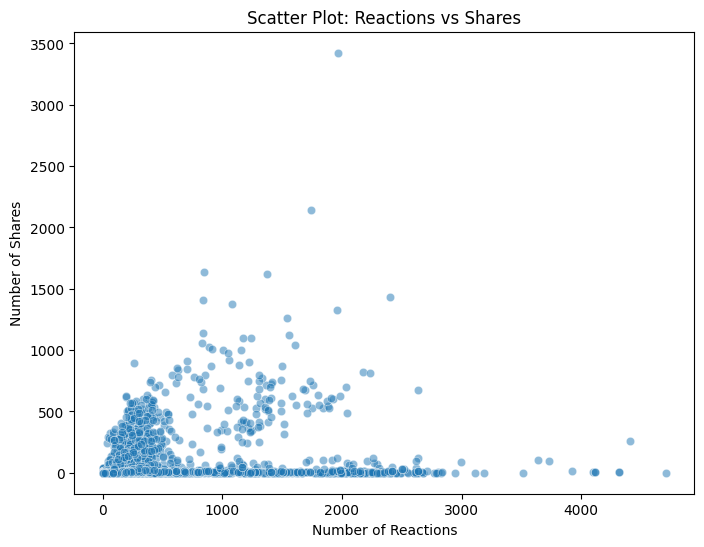

In [35]:

# scatter plot draw between num_reaction and num_shares
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['num_reactions'], y=df['num_shares'], alpha=0.5)
plt.xlabel("Number of Reactions")
plt.ylabel("Number of Shares")
plt.title("Scatter Plot: Reactions vs Shares")
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   int64         
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
 12  hour              7050 non-null   int32         
 13  month             7050 non-null   int32         
 14  day_of_week       7050 n

In [37]:
df['status_type'].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Select relevant columns
features = [
    "status_type", "num_reactions", "num_comments", "num_shares",
    "num_likes", "num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"
]

df_subset = df[features].copy()

# One-Hot Encode `status_type`
df_subset = pd.get_dummies(df_subset, columns=["status_type"], drop_first=True)

# Normalize numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_subset)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_subset.columns)


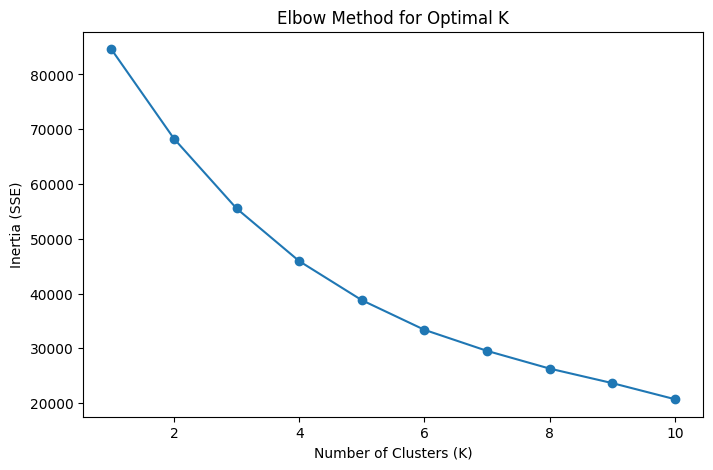

In [39]:
# Find optimal K using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [40]:
# Define number of clusters based on elbow method
optimal_k = 4
# Train K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)


In [41]:
# Convert scaled data back to original scale for analysis
df_clusters = pd.DataFrame(scaler.inverse_transform(df_scaled.drop(columns=["Cluster"])), columns=df_subset.columns)
df_clusters["Cluster"] = df_scaled["Cluster"]

# Compute mean values per cluster
cluster_summary = df_clusters.groupby("Cluster").mean()
cluster_summary


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
Cluster,,,,,,,,,,,,
0,906.905213,3476.014218,556.540284,701.099526,167.933649,21.445498,11.327014,3.199052,1.900474,0.061611,0.000000,0.938389
1,90.765921,11.145357,1.769810,88.672095,1.273943,0.548128,0.143899,0.100875,0.023821,0.988819,0.000000,0.000000
2,162.228547,331.288445,65.160153,140.096007,20.354291,0.597706,0.790144,0.261682,0.126168,0.000000,0.118946,0.879779
3,1821.218329,60.824798,10.946092,1815.469003,3.094340,2.433962,0.183288,0.032345,0.005391,0.557951,0.229111,0.175202


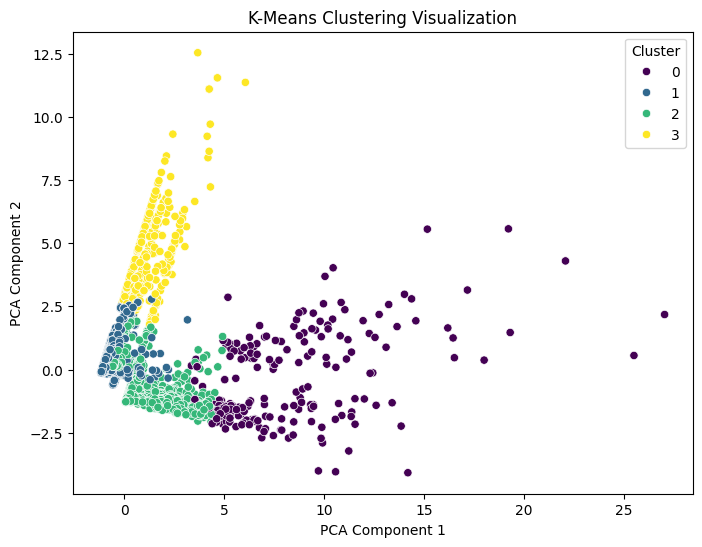

In [42]:
# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=["Cluster"]))

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_scaled["Cluster"], palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization")
plt.legend(title="Cluster")
plt.show()
